In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


## Elastic constants

In [13]:
elastic_constants = pd.read_csv('results/elastic_constants_medium.csv')
pivot = elastic_constants.pivot(index="element", columns="model", values=["alat", "C11", "C12", "C44"])
pivot = pivot.loc[["W", "Mo", "Nb"]]

In [14]:
print(pivot.round({'alat': 3, 'C11': 1, 'C12': 1, 'C44': 1}).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{2}{r}{alat} & \multicolumn{2}{r}{C11} & \multicolumn{2}{r}{C12} & \multicolumn{2}{r}{C44} \\
model & DFT & medium & DFT & medium & DFT & medium & DFT & medium \\
element &  &  &  &  &  &  &  &  \\
\midrule
W & 3.185400 & 3.188435 & 516.000000 & 324.851694 & 198.000000 & 217.434822 & 140.000000 & 77.508913 \\
Mo & 3.163000 & 3.170199 & 477.000000 & 343.134034 & 155.000000 & 234.166636 & 111.000000 & 38.082767 \\
Nb & 3.322000 & 3.313445 & 250.000000 & 206.829267 & 135.000000 & 128.946945 & 21.000000 & 30.390770 \\
\bottomrule
\end{tabular}



In [15]:
pivot["alat"].round(4)

model,DFT,medium
element,,
W,3.1854,3.1884
Mo,3.1630,3.1702
Nb,3.3220,3.3134


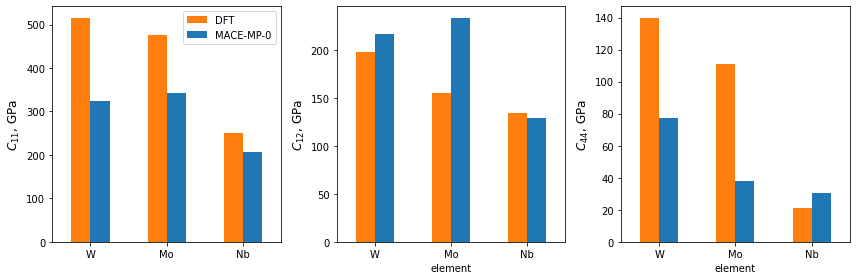

In [28]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

pivot.plot.bar(y="C11", rot=0, color=["C1", "C0", "C2", "C4"], ax=axes[0], legend=False)
pivot.plot.bar(y="C12", rot=0, color=["C1", "C0", "C2", "C4"], ax=axes[1], legend=False)
pivot.plot.bar(y="C44", rot=0, color=["C1", "C0", "C2", "C4"], ax=axes[2], legend=False)


axes[0].set_ylabel("$C_{11}$, GPa", fontsize=12)
axes[1].set_ylabel("$C_{12}$, GPa", fontsize=12)
axes[2].set_ylabel("$C_{44}$, GPa", fontsize=12)


axes[0].legend(loc="upper right", labels=["DFT", "MACE-MP-0"])
for ax in axes:
    ax.set_xlabel("")

fig.tight_layout()
fig.savefig("figures/elastic_constants.pdf")

## Energy vs volume

In [17]:
import matplotlib.pyplot as plt



def plot_eos(potential, label, axes=None): 
    color=["C1", "C0"]
    if axes is None:
        fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)

    for ax, symbol in zip(axes, ["W", "Mo", "Nb"]):

        eos = pd.read_csv(f"results/eos_MACE-MP-0-{potential}_{symbol}.csv")
        dft_eos = pd.read_csv(f"data/eos_DFT_{symbol}.csv")
        dft_eos.plot(x="V/atom_BCC", y="Delta_BCC_E", ax=ax, style="C0o", legend=False)
        dft_eos.plot(x="V/atom_FCC", y="Delta_FCC_E", ax=ax, style="C1s", legend=False)
        #dft_eos.plot(x="V/atom_A15", y="Delta_A15_E", ax=ax, style="C2^", legend=False)

        eos.plot(x="V/atom", y=["Delta_BCC_E", "Delta_FCC_E"], #"Delta_A15_E"], 
                label=["BCC", "FCC"], #"A15"], 
                ylabel="Energy (eV/atom)", legend=False, ax=ax, lw=2.)


        ax.set_xlim(13, 21)
        ax.set_ylim(-0.1, 0.95)
        ax.set_ylabel("$\Delta$E (eV/atom)")
        ax.set_title(f"{symbol}")
        ax.set_xlabel("Volume (A$^3$/atom)")

    first_legend_lines = [axes[1].plot([], [], marker='None', color='C0', linestyle='-')[0],
                        axes[1].plot([], [], marker='None', color='C1', linestyle='-')[0],
                        axes[1].plot([], [], marker='None', color='C2', linestyle='-')[0]]
    first_legend = axes[1].legend(first_legend_lines, ['BCC', 'FCC'],# 'A15'], 
                                  title=label, loc="upper center")

    # Create a list of Line2D objects that represent the markers in the second legend
    second_legend_lines = [axes[1].plot([], [], marker='o', color='C0', linestyle='None')[0],
                        axes[1].plot([], [], marker='s', color='C1', linestyle='None')[0],
                        axes[1].plot([], [], marker='^', color='C2', linestyle='None')[0]]

    # Add the second legend to the plot
    axes[1].legend(second_legend_lines, ['BCC', 'FCC'], #'A15'],
                    title="DFT", loc="lower right")
    # Add the first legend back to the plot
    axes[1].add_artist(first_legend)
    fig = axes[0].get_figure()
    fig.tight_layout()

    return fig

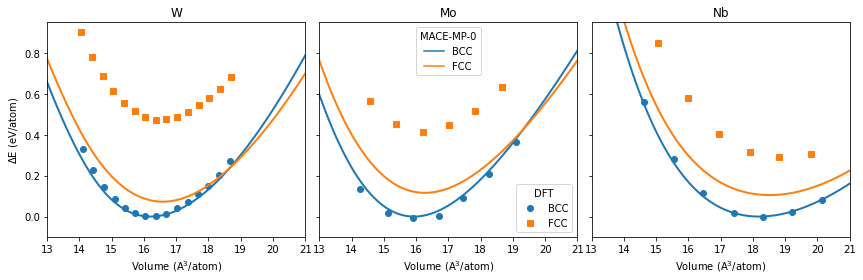

In [110]:
fig = plot_eos("medium", "MACE-MP-0")

fig.savefig("figures/eos_W_Mo_Nb_medium.pdf")

## Point defects

In [111]:
df_vac = pd.read_csv("results/MACE-MP_vac_formation_energies.csv", index_col=0)
df_vac

,MACE-MP,MACE-MP-0-small,MACE-MP-0-medium,MACE-MP-0-large,DFT
symbol,,,,,
W,2.632,3.165,2.632,2.139,3.35
Mo,2.231,3.318,2.231,1.817,2.83
Nb,2.213,2.861,2.213,2.373,2.71


In [112]:
df_sia = pd.read_csv("results/MACE-MP_sia_formation_energies.csv", index_col=0)  
df_sia

,MACE-MP,MACE-MP-0-small,MACE-MP-0-medium,MACE-MP-0-large,DFT
symbol,,,,,
W,5.287,6.167,5.287,6.827,10.180139
Mo,3.937,4.254,3.937,5.686,7.371824
Nb,3.734,3.416,3.734,5.516,3.953811


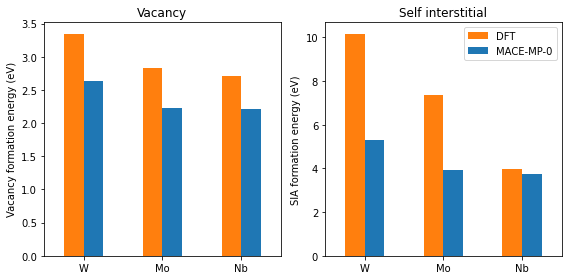

In [114]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

#axes[0] = df_vac.plot.bar(y=["DFT", "MACE-MP-0-small", "MACE-MP-0-medium", "MACE-MP-0-large"],rot=0, ax=axes[0], color=["C1", "C0", "C2", "C4"], legend=False)
axes[0] = df_vac.plot.bar(y=["DFT", "MACE-MP-0-medium"],
                          rot=0, ax=axes[0], color=["C1", "C0", "C2", "C4"], legend=False)
axes[0].set_ylabel("Vacancy formation energy (eV)")
axes[0].set_xlabel("")
#axes[0].legend(title="", labels=["DFT", "small", "medium", "large"])
axes[0].set_title("Vacancy")

df_sia.plot.bar(y=["DFT", "MACE-MP-0-medium"],
                rot=0, ax=axes[1], color=["C1", "C0", "C2", "C4"])
axes[1].set_ylabel("SIA formation energy (eV)")
axes[1].set_xlabel("")
axes[1].legend(title="", labels=["DFT", "MACE-MP-0"])
axes[1].set_title("Self interstitial")
fig.tight_layout()

fig.savefig("figures/vac_SIA_W_Mo_Nb_medium.pdf")

## Stacking faults

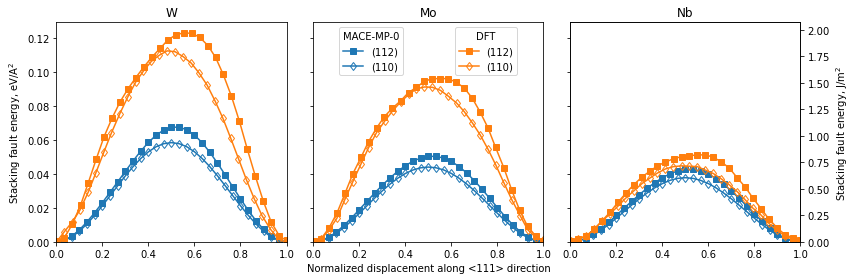

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ase.units import J, m

fig, rows = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

labels = ["(112)", "(110)"]

#colors = {"small": "C0", "medium": "C2", "large": "C4"}

colors = {"small": "C0", "medium": "C0", "large": "C4"}

potential = "MACE-MP-0-medium"
for ax, symbol in zip(rows, ["W", "Mo", "Nb"]):

    s, E = np.loadtxt(f"results/gamma_line_{potential}_screw_{symbol}_0.csv", unpack=True)
    mace_0 = ax.plot(s /s.max(), E[::-1] , "-s", color=colors[potential.split("-")[-1]], label=labels[0])

    s, E = np.loadtxt(f"results/gamma_line_{potential}_screw_{symbol}_1.csv", unpack=True)
    mace_1 = ax.plot(s /s.max(), E[::-1], "-d", markerfacecolor='none', color=colors[potential.split("-")[-1]], label=labels[1])

    s, E = np.loadtxt(f"data/gamma_line_DFT_screw_{symbol}_0.csv", unpack=True, delimiter=',',)
    dft_0 = ax.plot(s /s.max(), E * J / m**2, "-s", color="C1", label=labels[0])
    s, E = np.loadtxt(f"data/gamma_line_DFT_screw_{symbol}_1.csv", unpack=True, delimiter=',',)
    dft_1 = ax.plot(s /s.max(), E * J / m**2, "-d", markerfacecolor='none', color="C1", label=labels[1])

    ax.set_title(symbol)

first_legend = rows[1].legend(loc="upper center", handles=[mace_0[0], mace_1[0]], #title=potential.split("-")[:-1], 
                              title="MACE-MP-0",
                               bbox_to_anchor=(0.25, 1.0))
rows[1].legend(loc="upper center", handles=[dft_0[0], dft_1[0]], title="DFT", bbox_to_anchor=(0.75, 1.0))
rows[1].add_artist(first_legend)
rows[0].set_xlim(0, 1)
rows[0].set_ylim(0, rows[0].get_ylim()[1])

rows[0].set_ylabel("Stacking fault energy, eV/A$^2$")
twin_ax = rows[2].twinx()
twin_ax.set_ylim(np.array(rows[0].get_ylim()) / J * m**2)
twin_ax.set_ylabel("Stacking fault energy, J/m$^2$")


rows[1].set_xlabel("Normalized displacement along <111> direction")

fig.tight_layout()

fig.savefig("figures/stacking_fault_energy_W_Mo_Nb_medium.pdf")